In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Product_Reviews (3).csv')
df.head()

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE


In [ ]:
# All at once (EDA)
print('shape is',df.shape)
print('columns are',df.columns)
print(df.info())
print(df.describe(include='all'))
print(df.nunique())
print(df.isnull().sum())

shape is (1007, 3)
columns are Index(['Product ID', 'Product Review', 'Sentiment'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      1007 non-null   object
 1   Product Review  1007 non-null   object
 2   Sentiment       1007 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB
None
                  Product ID  \
count                   1007   
unique                    66   
top     AVpfpK8KLJeJML43BCuD   
freq                     542   

                                           Product Review Sentiment  
count                                                1007      1007  
unique                                                908         3  
top     I'm a huge fan of the Echo family. I have two ...  POSITIVE  
freq                                                    6       852  
Product ID       

In [ ]:
df.shape

(1007, 3)

In [ ]:
print(df.duplicated().sum())
df=df.drop_duplicates()

2


In [ ]:
df.shape

(1005, 3)

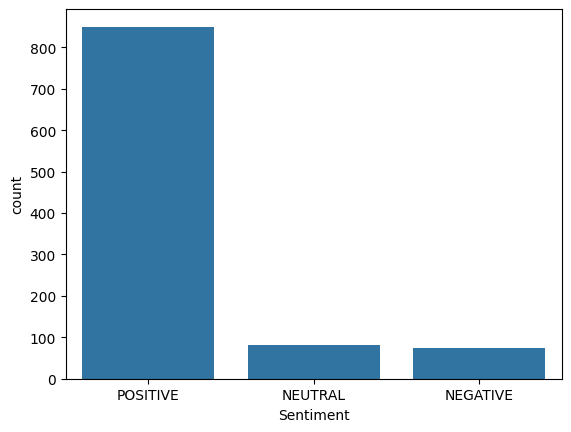

In [ ]:
sns.countplot(data=df, x="Sentiment");

In [ ]:
df['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv("Product_Reviews (3).csv")

# Download stopwords (only needed once)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define function to clean text and remove stopwords
def clean_text(text):
    text = str(text).lower() # Ensure it's a string and lowercase
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()    # Remove extra spaces

    # Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to create a cleaned review column
df['Cleaned_text'] = df['Product Review'].apply(clean_text)

# Preview the cleaned data
print(df[['Product Review', 'Cleaned_text']].head())


                                      Product Review  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                        Cleaned_text  
0  initially trouble deciding paperwhite voyage r...  
1  allow preface little history casual reader own...  
2  enjoying far great reading original fire since...  
3  bought one first paperwhites pleased constant ...  
4  say upfront dont like coroporate hermetically ...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#for stemming we use porter stemmer() stemming is for faster
#for lemmatization we use wordnetlemmatizer() lemmatization is for more accuracy
#POS- parts of speech

In [ ]:
import nltk
from nltk.stem import PorterStemmer

# Initialize stemmer
stemmer = PorterStemmer()


def stem_text(text):

    text = str(text).lower()  # lowercase
    words = text.split()      # split into words
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

l=['running','studies','flies','happiness']
for texts in l:
  s=stem_text(texts)
  print(s)

run
studi
fli
happi


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download once if not already
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    text = str(text).lower()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)


l=['running','studies','flies','happiness']
for texts in l:
  s=lemmatize_text(texts)
  print(s)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


running
study
fly
happiness


[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([apply_porter_stemmer(word) for word in words])

    return new_text

In [ ]:
# Applying the function to perform stemming
df['final_cleaned_text'] = df['Cleaned_text'].apply(apply_porter_stemmer)

RecursionError: maximum recursion depth exceeded

In [ ]:
df[['Cleaned_text']].head()

,Cleaned_text
0,initially trouble deciding paperwhite voyage r...
1,allow preface little history casual reader own...
2,enjoying far great reading original fire since...
3,bought one first paperwhites pleased constant ...
4,say upfront dont like coroporate hermetically ...


##BOW

In [ ]:
text=["This is Text",'Text another text','Another text']
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer()
data_feature_bow=bow.fit_transform(text)
data_feature_bow=data_feature_bow.toarray()

In [ ]:
words=bow.get_feature_names_out()

In [ ]:
df_bow=pd.DataFrame(data_feature_bow,columns=words)
df_bow

,another,is,text,this
0,0,1,1,1
1,1,0,2,0
2,1,0,1,0


In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying CountVectorizer on data
data_features_BOW = bow_vec.fit_transform(df['Cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()


# Shape of the feature vector
print("Shape of the feature vector",data_features_BOW.shape)

# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()


Shape of the feature vector (1007, 1000)
first 10 words ['10' '100' '139' '15' '16level' '20' '2013' '2014' '2015' '212']
last 10 words ['write' 'writing' 'wrong' 'year' 'years' 'yes' 'yet' 'youll' 'youre'
 'youtube']


,10,100,139,15,16level,20,2013,2014,2015,212,...,write,writing,wrong,year,years,yes,yet,youll,youre,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


##TF_IDF
TF-IDF tells how important a word is in a document

TF-IDF=TF*IDF

TF-> Term Frequrncy
IDF-> Inverse Document Frequency

TF= number of times a word appear in a document/total words in a document

IDF= log(N/df)
N->  Total number of documents
df-> number of documents containing the word

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data=["AI makes design efficient","AI helps architects in design"]
tfidf=TfidfVectorizer()
data_features_tfidf=tfidf.fit_transform(data)
data_features_tfidf=data_features_tfidf.toarray()

words=tfidf.get_feature_names_out()

df_tfidf=pd.DataFrame(data_features_tfidf,columns=words)
df_tfidf

,ai,architects,design,efficient,helps,in,makes
0,0.409937,0.000000,0.409937,0.576152,0.000000,0.000000,0.576152
1,0.355200,0.499221,0.355200,0.000000,0.499221,0.499221,0.000000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing tfidf
tfidf = TfidfVectorizer(max_features=1000)

# Applying TfidfVectorizer on data
data_features_tfidf = tfidf.fit_transform(df['Cleaned_text'])

# Convert the data features to array
data_features_tfidf = data_features_tfidf.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_tfidf.shape)

# Getting the 1000 words considered by the BoW model
words = tfidf.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_tfidf = pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()


##N-Grams
by this we can convert any text into numbers

In [ ]:
data=["This is document",'another',"hi"]

ngram=CountVectorizer(ngram_range=(2,3))

data_features_ngram=ngram.fit_transform(data)
data_features_ngram=data_features_ngram.toarray()

In [ ]:
words=ngram.get_feature_names_out()

df_ngram=pd.DataFrame(data_features_ngram,columns=words)
df_ngram

In [ ]:
# Initializing CountVectorizer with top 1000 words
ngram = CountVectorizer(max_features = 1000,ngram_range=(1, 2))

# Applying CountVectorizer on data
data_features_ngram = ngram.fit_transform(df['Cleaned_text'])

# Convert the data features to array
data_features_ngram = data_features_ngram.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_ngram.shape)

# Getting the 1000 words considered by the BoW model
words = ngram.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_ngram = pd.DataFrame(data_features_ngram, columns=ngram.get_feature_names_out())
df_ngram.head()

## apply ML model ex random forest in the 3 datasets
df_bow

df_tfidf

df_ngrams

when output is of categories form we apply classification

we evaluate classification algo by:
Accuracy, Pecision, Recall, F1 Score, Roc-Auc Curve

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("Product_Reviews (3).csv")
df.dropna(subset=["Product Review", "Sentiment"], inplace=True)
df['Product Review'] = df['Product Review'].astype(str)

# 2. Encode labels
le = LabelEncoder()
df['Sentiment_Encoded'] = le.fit_transform(df['Sentiment'])

# 3. Feature and target
X = df['Product Review']
y = df['Sentiment_Encoded']

# 4. TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# 6. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7. Predict
y_pred = rf.predict(X_test)

# 8. Accuracy and Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Create a list of datasets and their labels
vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]

# Your target variable
y = df['Sentiment']

# Store results
results = []

# Loop over each dataset and train both classifiers
for name, X in vectorized_datasets:
    # Split data (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))

    # Multinomial Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))

# Sort results by F1 score (descending)
results.sort(key=lambda x: x[1], reverse=True)

# Print all F1 scores
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")




In [ ]:
# Best model
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]

print(f"\n Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()